In [1]:
import lseg.data as ld

# Generacion de indicadores burstatiles
import talib as ta

# Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Generacion de modelos y metricas
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap 

# Obtencion de fechas
import datetime

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Lectura de llave
ld.open_session()

<lseg.data.session.Definition object at 0x17fc36410 {name='workspace'}>

In [3]:
# Se define la fecha para la extracción de datos
end = datetime.datetime.now().date()
start = end - datetime.timedelta(days=10 * 365)
print(start, end)

2015-09-25 2025-09-22


In [4]:
df = ld.get_data(
        universe=["MSFT.O"],
        fields=["TR.RevenueMean(Period=FY1).calcdate", 'TR.CLOSEPRICE', "TR.FWDPE", "TR.PE", "TR.EPSMean", "TR.RevenueMean(Period=FY1)"],
        parameters={
            'SDate': str(start), # Start Date
            'EDate': str(end), # End Date
        }
    )
df.set_index("Calc Date", inplace = True)
df

,Instrument,Close Price,Forward P/E (Daily Time Series Ratio),P/E (Daily Time Series Ratio),Earnings Per Share - Mean,Revenue - Mean
Calc Date,,,,,,
2015-09-25,MSFT.O,43.94,15.881336,30.111565,2.6781,91852090580
2015-09-28,MSFT.O,43.29,15.628933,29.666128,2.6781,91852090580
2015-09-29,MSFT.O,43.44,15.677251,29.768921,2.6781,91852090580
2015-09-30,MSFT.O,44.26,15.967242,30.330857,2.6781,91852090580
2015-10-01,MSFT.O,44.61,16.087526,30.570708,2.6781,91852090580
...,...,...,...,...,...,...
2025-09-16,MSFT.O,509.04,31.685819,37.316721,15.49848,322466603500
2025-09-17,MSFT.O,510.02,31.732466,37.388563,15.49848,322466603500
2025-09-18,MSFT.O,508.45,31.634784,37.273469,15.49848,322466603500


Text(0.5, 0, 'Fecha')

<Figure size 1500x500 with 0 Axes>

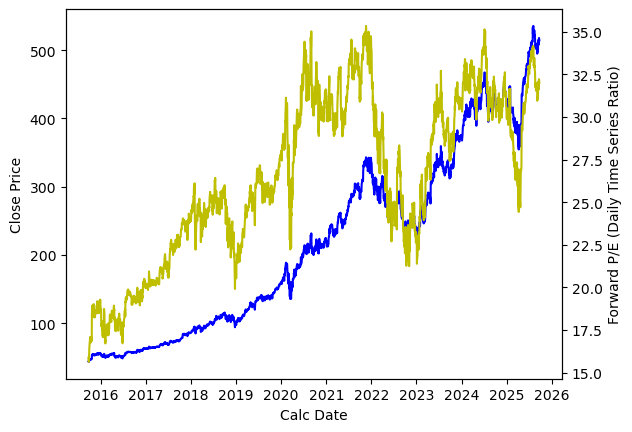

In [11]:
# Se define el indicador

# Se define el tamaño del lienzo
plt.figure(figsize=(15,5))

fig, ax1 = plt.subplots() # initializes figure and plots

# Se define los valores a graficar
sns.lineplot(data=df["Close Price"],color="b")
ax2 = plt.twinx()
sns.lineplot(data=df["Forward P/E (Daily Time Series Ratio)"], color="y", ax = ax2)

#sns.lineplot(data=df[["Close Price", "P/E (Daily Time Series Ratio)"]], ax = ax2)

# Se agregan etiquetas de nombres
plt.ylabel("Forward P/E (Daily Time Series Ratio)")
#plt.ylabel("P/E (Daily Time Series Ratio)")
plt.xlabel("Fecha")

Free Cash Flow to Firm (FCFF) 
Step-by-Step Guide to Understanding Free Cash Flow to Firm (FCFF)
https://www.wallstreetprep.com/knowledge/free-cash-flow-to-firm-fcff/


EBITDA
- Depreciation & Amortization
= EBIT
- Taxes
+ D&A
- CAPEX
- Change in Net Working Capital
= FCFF

Change in Net Working Capital = Beginning NWC - Ending NWC
NWC = Operating current assets - Operating current liabilities
Operating current assets = Account receivables (A/R), Inventory, prepaid Expenses
Operating current libailities = Accounts payables (A/P), Accured expense


In [56]:
df = ld.get_history(
        universe=["VRT.N"],
        fields=["TR.EBITDA", "TR.EBIT","TR.F.TOTREVASR", "TR.F.COGSASR", "TR.F.COGSASR", "TR.F.SGAASR",
                "TR.F.OPPROFINCOPASR", "TR.F.DEPRTOTASR", 
                "TR.F.AMORTOFINTANGEXCLGOODWTOTASR", "TR.F.INTREXPNINCNETASR", 
                "TR.F.PPENETTOTASR", "TR.F.PPEACCUMDEPRASR"],
        parameters={
            'SDate': str(start), # Start Date
            'EDate': str(end), # End Date
        }
    )
df

VRT.N,Total Revenue (ASR),Cost of Revenues (ASR),Selling General & Administrative Expenses (ASR),Operating Profit/Income from Operations (ASR),Depreciation - Total (ASR),Amortization of Intangible Assets excl Goodwill Total (ASR),Interest Expense/Income - Net (ASR),Property Plant & Equipment - Net - Total (ASR),PPE - Accumulated Depreciation & Impairment (ASR)
Date,,,,,,,,,
2017-12-31,3879400000,2028400000,1086000000,-407100000,64500000,279800000,379300000,462800000,-65700000
2017-12-31,<NA>,538400000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2018-12-31,4285600000,2274500000,1223800000,-271000000,60400000,156600000,288800000,441700000,-114700000
2018-12-31,<NA>,590700000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2019-12-31,4431200000,2349200000,1100800000,-104300000,57100000,145800000,310400000,428200000,-164300000
2019-12-31,<NA>,629000000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-12-31,4370600000,2290500000,1008400000,-254600000,60300000,142800000,150400000,427600000,-220800000
2020-12-31,<NA>,606400000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2021-12-31,4998100000,2814500000,1109000000,166200000,69100000,157900000,90600000,489300000,-266000000
